In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw10.ok')

Assignment: Homework 10: Linear Regression
OK, version v1.12.5



# Homework 10: Linear Regression


**Reading**: 
* [Prediction](https://www.inferentialthinking.com/chapters/15/prediction.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 10 is due **Thursday, 4/18 at 11:59pm**. You will receive an early submission bonus point if you turn in your final submission by Wednesday, 4/17 at 11:59pm. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. Late work will not be accepted as per the [policies](http://data8.org/sp19/policies.html) of this course. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [23]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.notebook import Notebook
ok = Notebook('hw10.ok')


Assignment: Homework 10: Linear Regression
OK, version v1.12.5



## 1. Triple Jump Distances vs. Vertical Jump Heights


Does skill in one sport imply skill in a related sport?  The answer might be different for different activities.  Let us find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (a horizontal jump similar to a long jump) and the vertical jump.  Since we're learning about linear regression, we will look specifically for a *linear* association between skill level in the two sports.

The following data was collected by observing 40 collegiate level soccer players.  Each athlete's distances in both jump activities were measured in centimeters. Run the cell below to load the data.

In [24]:
# Run this cell to load the data
jumps = Table.read_table('triple_vertical.csv')
jumps.sort('triple',descending = True)

triple,vertical
781,71.1
745.95,66.14
686.42,65.85
683.56,48.55
679.95,67.6
667.12,61.5
644.69,59.38
638.67,60.1
630.6,66.76
624.52,61.33


**Question 1**

Create the function `standard_units` so that it converts the values in the array `data` to standard units.

<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [25]:
def standard_units(data):
    return (data - np.average(data))/np.std(data)

In [26]:
ok.grade("q1_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2**

Now, using `standard units`, define the function `correlation` which computes the correlation between `x` and `y`.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [27]:
def correlation(x, y):
    return np.average(standard_units(x)*standard_units(y))

In [28]:
ok.grade("q1_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 3
Before running a regression, it's important to see what the data look like, because our eyes are good at picking out unusual patterns in data.  Draw a scatter plot with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis **that also shows the regression line**. 

See the documentation on `scatter` [here](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) for instructions on how to have Python draw the regression line automatically.

<!--
BEGIN QUESTION
name: q1_3
manual: true
image: true
-->
<!-- EXPORT TO PDF -->

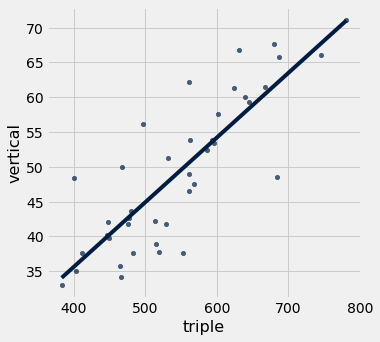

In [29]:
jumps.scatter('triple','vertical',overlay=True, fit_line=True, colors=None, labels=None, sizes=None, width=5, height=5, s=20)

#### Question 4
Does the correlation coefficient `r` look closest to 0, .5, or -.5? Explain. 

<!--
BEGIN QUESTION
name: q1_4
manual: true
-->
<!-- EXPORT TO PDF -->

The coefficient looks closer to 0.5 more than 0 or -0.5. This is because the relationship is direct, not inverse, so we know it can't be -0.5. And then of course, clearly there is a relationship observed above so it can't 0.

#### Question 5
Create a function called `parameter_estimates`. It takes as its argument a table with two columns.  The first column is the x-axis, and the second column is the y-axis.  It should compute the correlation between the two columns, then compute the slope and intercept of the regression line that predicts the second column from the first, in original units (centimeters).  It should return an array with three elements: the correlation coefficient of the two columns, the slope of the regression line, and the intercept of the regression line.

<!--
BEGIN QUESTION
name: q1_5
manual: false
-->

In [30]:
def parameter_estimates(t):
    y_mean = np.average(t.column(1))
    y_sd = np.std(t.column(1))
    x_mean = np.average(t.column(0))
    x_sd = np.std(t.column(0))
    r = correlation(t.column(0),t.column(1))
    slope = r*y_sd/x_sd
    intercept = y_mean - slope*x_mean
    return make_array(r, slope, intercept)

parameters = parameter_estimates(jumps)
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

r: 0.8343076972837598 ; slope: 0.09295728160512184 ; intercept: -1.566520972963474


In [31]:
ok.grade("q1_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6**

Now suppose you want to go the other way: to predict a triple jump distance given a vertical jump distance. What would the regression parameters of this linear model be? How do they compare to the regression parameters from the model where you were predicting vertical jump distance given a triple jump distance? Set `regression_changes` to an array of 3 elements, with each element corresponding to whether or not the corresponding item returned by `regression_parameters` changes when switching vertical and triple as $x$ and $y$. For example, if r changes, the slope changes, but the intercept wouldn't change, the array would be `[True, True, False]`

<!--
BEGIN QUESTION
name: q1_6
manual: false
-->

In [32]:
regression_changes = [False,True,True]
regression_changes

[False, True, True]

In [33]:
ok.grade("q1_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 7
Let's use `parameters` to predict what certain athletes' vertical jump heights would be given their triple jump distances.

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What is the prediction for Edward’s vertical jump using this line?

**Hint:** Make sure to convert from meters to centimeters!

<!--
BEGIN QUESTION
name: q1_7
manual: false
-->

In [34]:
triple_record_vert_est = parameters.item(1)*1829 + parameters.item(2)
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 168.452347 centimeters


In [35]:
ok.grade("q1_7");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 8
Do you think it makes sense to use this line to predict Edward’s vertical jump?

*Hint:* Compare Edwards' triple jump distance to the triple jump distances in `jumps`. Is it relatively similar to the rest of the data? 

<!--
BEGIN QUESTION
name: q1_8
manual: true
-->
<!-- EXPORT TO PDF -->

No, it doesn't make sense to do so since our line is used to predict data for jump distance around 800 m but his jump was over 18 m which doesn't lie in our range.

## 2. Cryptocurrencies


Imagine you're an investor in December 2017. Cryptocurrencies, online currencies backed by secure software, are becoming extremely valuable, and you want in on the action!

The two most valuable cryptocurrencies are Bitcoin (BTC) and Ethereum (ETH). Each one has a dollar price attached to it at any given moment in time. For example, on December 1st, 2017, one BTC costs $\$$10859.56 and one ETH costs $\$$424.64. 

**You want to predict the price of ETH at some point in time based on the price of BTC.** Below, we [load](https://www.kaggle.com/jessevent/all-crypto-currencies/data) two tables called `btc` and `eth`. Each has 5 columns:
* `date`, the date
* `open`, the value of the currency at the beginning of the day
* `close`, the value of the currency at the end of the day
* `market`, the market cap or total dollar value invested in the currency
* `day`, the number of days since the start of our data

In [36]:
btc = Table.read_table('btc.csv')
btc

date,open,close,market,day
2015-09-29,239.02,236.69,3505090000,1
2015-09-30,236.64,236.06,3471280000,2
2015-10-01,236,237.55,3462800000,3
2015-10-02,237.26,237.29,3482190000,4
2015-10-03,237.2,238.73,3482100000,5
2015-10-04,238.53,238.26,3502460000,6
2015-10-05,238.15,240.38,3497740000,7
2015-10-06,240.36,246.06,3531230000,8
2015-10-07,246.17,242.97,3617400000,9
2015-10-08,243.07,242.3,3572730000,10


In [37]:
eth = Table.read_table('eth.csv')
eth

date,open,close,market,day
2015-09-29,0.579414,0.661146,42607700,1
2015-09-30,0.661192,0.738644,48636600,2
2015-10-01,0.734307,0.690215,54032300,3
2015-10-02,0.683732,0.678574,50328700,4
2015-10-03,0.678783,0.687171,49981900,5
2015-10-04,0.686343,0.668379,50556000,6
2015-10-05,0.666784,0.628643,49131600,7
2015-10-06,0.622218,0.650645,45863300,8
2015-10-07,0.650515,0.609388,47964700,9
2015-10-08,0.609501,0.621716,44955900,10


#### Question 1

In the cell below, create a line plot that visualizes the BTH and ETC open prices as a function of time. Both bth and etc open prices should be plotted on the same graph.

<!--
BEGIN QUESTION
name: q2_1
manual: true
image: true
-->
<!-- EXPORT TO PDF -->

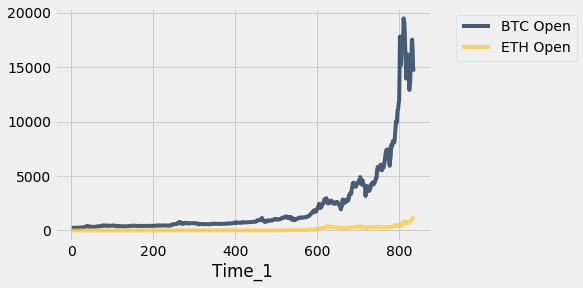

In [38]:
# Create a line plot of bth and etc open prices as a function of time
new_table = Table().with_columns('BTC Open',btc.column('open'),'ETH Open',eth.column('open'),'Time_1',btc.column('day'))
new_table.plot('Time_1')

#### Question 2

Now, calculate the correlation coefficient between the opening prices of BTC and ETH using the `correlation` function you defined earlier.

<!--
BEGIN QUESTION
name: q2_2
manual: false
-->

In [39]:
r = correlation(btc.column('open'),eth.column('open'))
r

0.9250325764148278

In [40]:
ok.grade("q2_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 3
Regardless of your conclusions above, write a function `eth_predictor` which takes an opening BTC price and predicts the opening price of ETH. Again, it will be helpful to use the function `regression_parameters` that you defined earlier in this homework.

**Note:** Make sure that your `eth_predictor` is using least squares linear regression.

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [41]:
def eth_predictor(btc_price):
    parameters = parameter_estimates(new_table)
    slope = parameters.item(1)
    intercept = parameters.item(2)
    return btc_price*slope + intercept

In [42]:
ok.grade("q2_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 4

Now, using the `eth_predictor` you defined in the previous question, make a scatter plot with BTC prices along the x-axis and both real and predicted ETH prices along the y-axis. The color of the dots for the real ETH prices will be different from the color for the predicted ETH prices.

Hints:
* An example of such a scatter plot is generated <a href= "https://www.inferentialthinking.com/chapters/15/2/regression-line.html
"> here. </a>
* Think about the table that must be produced and used to generate this scatter plot. What data should the columns represent? Based on the data that you need, how many columns should be present in this table? Also, what should each row represent? Constructing the table will be the main part of this question; once you have this table, generating the scatter plot should be straightforward as usual.

<!--
BEGIN QUESTION
name: q2_4
manual: true
image: true
-->
<!-- EXPORT TO PDF -->

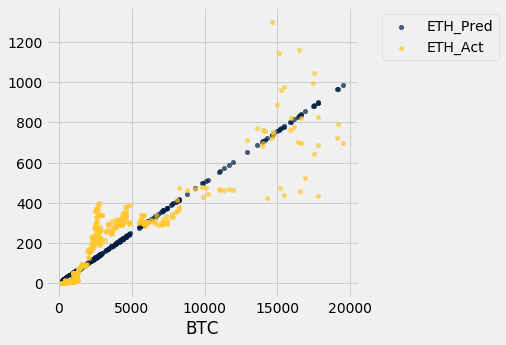

In [44]:
btc_open = btc.column('open')
eth_pred = eth_predictor(btc_open)
eth_pred_actual = eth.column('open')
Table().with_columns('BTC',btc_open,'ETH_Pred',eth_pred,'ETH_Act',eth_pred_actual).scatter('BTC')

#### Question 5
Considering the shape of the scatter plot of the true data, is the model we used reasonable? If so, what features or characteristics make this model reasonable? If not, what features or characteristics make it unreasonable?

<!--
BEGIN QUESTION
name: q2_5
manual: true
-->
<!-- EXPORT TO PDF -->

The model we used is not so reasonable because we see that for values closer to the origin the line of best fit is a fitting model however for points around BTC = 15000, the points are super scattered and don't really stick close to our model. Additionally, the data does not look linear or football shaped. 

## 3. Evaluating NBA Game Predictions


#### A brief introduction to sports betting

In a basketball game, each team scores some number of points.  Conventionally, the team playing at its own arena is called the "home team," and the other team is called the "away team."  The winner is the team with more points.

We can summarize what happened in a game by the "**outcome**", defined as the **the away team's score minus the home team's score**:

$$\text{outcome} = \text{points scored by the away team} - \text{points scored by the home team}$$

If this number is positive, the away team won.  If it's negative, the home team won. 

In order to facilitate betting on games, analysts at casinos try to predict the outcome of the game. This prediction of the outcome is called the **spread.**


In [ ]:
spreads = Table.read_table("spreads.csv")
spreads

Here's a scatter plot of the outcomes and spreads, with the spreads on the horizontal axis.

In [ ]:
spreads.scatter("Spread", "Outcome")

From the scatter plot, you can see that the spread and outcome are almost never 0, aside from 1 case of the spread being 0. This is because a game of basketball never ends in a tie. One team has to win, so the outcome can never be 0. The spread is almost never 0 because it's chosen to estimate the outcome.

Let's investigate how well the casinos are predicting game outcomes.

One question we can ask is: Is the casino's prediction correct on average? In other words, for every value of the spread, is the average outcome of games assigned that spread equal to the spread? If not, the casino would apparently be making a systematic error in its predictions.

#### Question 1
Compute the correlation coefficient between outcomes and spreads. 

**Note:** It might be helpful to use the `correlation` function.

<!--
BEGIN QUESTION
name: q3_1
manual: false
-->

In [ ]:
spread_r = correlation(spreads.column('Spread'),spreads.column('Outcome'))
spread_r

In [ ]:
ok.grade("q3_1");

#### Question 2
Among games with a spread between 3.5 and 6.5 (including both 3.5 and 6.5), what was the average outcome? 

*Hint:* Read the documentation for the predicate `are.between_or_equal_to` [here](http://data8.org/datascience/predicates.html#datascience.predicates.are.between_or_equal_to).

<!--
BEGIN QUESTION
name: q3_2
manual: false
-->

In [ ]:
spreads_around_5 = spreads.where('Spread',are.between_or_equal_to(3.5, 6.5)).column('Spread')
spread_5_outcome_average = np.average(spreads_around_5)
print("Average outcome for spreads around 5:", spread_5_outcome_average)

In [ ]:
ok.grade("q3_2");

#### Question 3
Compute the slope of the least-squares linear regression line that predicts outcomes from spreads, in original units.

<!--
BEGIN QUESTION
name: q3_3
manual: false
-->

In [ ]:
spread_slope = spread_r*np.std(spreads.column('Outcome'))/np.std(spreads.column('Spread'))
spread_slope

In [ ]:
ok.grade("q3_3");

#### Question 4
Suppose that we create another predictor that simply predicts the average outcome regardless of the value for spread. Does this new predictor minimize least squared error? 

<!--
BEGIN QUESTION
name: q3_4
manual: true
-->
<!-- EXPORT TO PDF -->

No, it won't work because the linear regression model that we made above is the only one that minimizes the error.

## 4. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [ ]:
_ = ok.submit()

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")